<a href="https://colab.research.google.com/github/Imran1hp/Titanic---Machine-Learning-from-Disaster/blob/main/Titanic_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
# !pip install  seaborn matplotlib plotly scikit-learn opendatasets --upgrade --quiet

In [177]:
!pip install opendatasets --upgrade --quiet

In [178]:
# !pip install numpy pandas  --quiet


In [179]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt
import plotly.express as px

In [180]:
data_url = 'https://www.kaggle.com/competitions/titanic/data'

In [181]:
od.download(data_url)

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [182]:
os.listdir("titanic")

['gender_submission.csv', 'test.csv', 'train.csv']

In [183]:
train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")
submission_df = pd.read_csv("titanic/gender_submission.csv")

In [184]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [185]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [186]:
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [187]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [188]:
train_df = train_df.sort_values(by='PassengerId',ascending = True)


In [189]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [190]:
def imputer (df):
  df['Age'] = df['Age'].fillna(df['Age'].mean())
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
  df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
  return df

In [191]:
train_df = imputer(train_df).copy()
test_df = imputer(test_df).copy()

In [192]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [193]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [194]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [195]:
fig = px.histogram(train_df,
                   x="Age",
                   marginal ='box',
                   nbins=47,
                   color= 'Survived',
                   color_discrete_sequence=['red','blue'],
                   title="Age Distribution")
fig.update_layout(bargap=0.1)
fig.show()

In [196]:
fig = px.histogram(train_df,
                   x='Sex',
                   marginal='box',
                   nbins=47,
                   color='Survived',
                   color_discrete_sequence=['red','blue'],
                   title='Sex Distribution')
fig.update_layout(bargap=0.1)
fig.show()


In [197]:
train_df [['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


/tmp/ipython-input-1672681705.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Survived'>

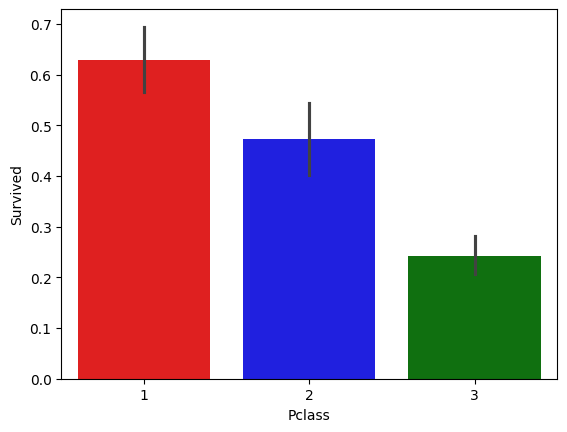

In [198]:
sns.barplot(
    x='Pclass',
    y='Survived',
    data=train_df,
    palette=['red','blue','green']
)

In [199]:
train_df[['Sex','Survived']].groupby('Sex',as_index = False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


/tmp/ipython-input-404308807.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Sex', ylabel='Survived'>

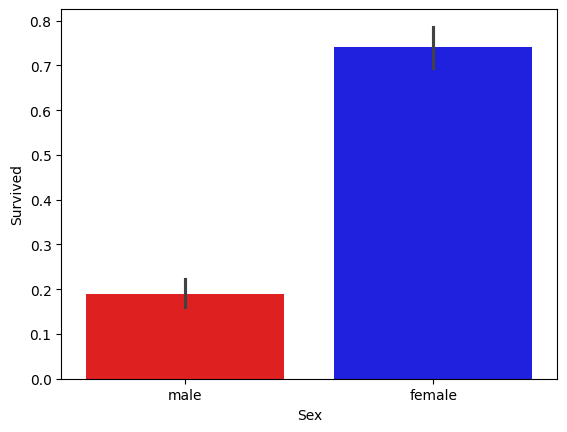

In [200]:
sns.barplot(
    x='Sex',
    y='Survived',
    data=train_df,
    palette=['red','blue']
)

In [201]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [202]:
combine =[train_df,test_df]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])


<>:3: SyntaxWarning:

invalid escape sequence '\.'

<>:3: SyntaxWarning:

invalid escape sequence '\.'

/tmp/ipython-input-613161785.py:3: SyntaxWarning:

invalid escape sequence '\.'



Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [203]:
for dataset in combine:
   dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Others')

   dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
   dataset['Title']  = dataset['Title'].replace('Ms','Mrs')
   dataset['Title'] = dataset['Title'].replace('Mme','Mr')

train_df[['Title','Survived']].groupby('Title',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.701087
0,Master,0.575000
4,Others,0.347826
2,Mr,0.158301


In [204]:
title_mapping ={'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Others':5}
for dataset in combine :
  dataset['Title'] = dataset["Title"].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,2


In [205]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name','PassengerId'],axis=1)


In [206]:
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]

In [207]:
train_df.shape,test_df.shape

((891, 9), (418, 8))

In [208]:
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'male':1,'female':0})
  dataset['Embarked'] = dataset['Embarked'].map({'C':0,'Q':1,'S':2})
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.000000,1,0,7.2500,2,1
1,1,1,0,38.000000,1,0,71.2833,0,2
2,1,3,0,26.000000,0,0,7.9250,2,3
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,5
887,1,1,0,19.000000,0,0,30.0000,2,3
888,0,3,0,29.699118,1,2,23.4500,2,3
889,1,1,1,26.000000,0,0,30.0000,0,1


In [209]:
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
  dataset['IsAlone'] = dataset['FamilySize'].map(lambda x:1 if x==1 else 0)


In [210]:
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [211]:
train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [212]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,1,34.50000,0,0,7.8292,1,1,1,1
1,3,0,47.00000,1,0,7.0000,2,2,2,0
2,2,1,62.00000,0,0,9.6875,1,1,1,1
3,3,1,27.00000,0,0,8.6625,2,1,1,1
4,3,0,22.00000,1,1,12.2875,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2,1,1,1
414,1,0,39.00000,0,0,108.9000,0,5,1,1
415,3,1,38.50000,0,0,7.2500,2,1,1,1
416,3,1,30.27259,0,0,8.0500,2,1,1,1


In [213]:
train_df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,0
FamilySize,0


In [214]:
list(test_df.columns)

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Title',
 'FamilySize',
 'IsAlone']

In [215]:
input_cols = [
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Title',
 'FamilySize',
 'IsAlone']
target_df = train_df['Survived']
X_train = train_df[input_cols]
X_test = test_df[input_cols]

In [216]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df[input_cols])

train_df[input_cols] = scaler.transform(train_df[input_cols])
test_df[input_cols] = scaler.transform(test_df[input_cols])

In [217]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.00,0.1,0.0
1,1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.25,0.1,0.0
2,1,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0,0.50,0.0,1.0
3,1,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.25,0.1,0.0
4,0,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0,1.00,0.0,1.0
887,1,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.50,0.0,1.0
888,0,1.0,0.0,0.367921,0.125,0.333333,0.045771,1.0,0.50,0.3,0.0
889,1,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0,0.00,0.0,1.0


In [218]:
from sklearn.metrics import accuracy_score


def error_score(predic_value):
 return accuracy_score(target_df,predic_value)



In [219]:

predictions = train_df['Sex'].apply(lambda x: 1 if x == 0 else 0)
error_score(predictions)

0.7867564534231201

In [220]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,target_df)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [221]:
Log_predic = model_logistic.predict(X_train)
error_score(Log_predic)

0.8103254769921436

In [240]:
log_test_pred = model_logistic.predict(X_test)

In [252]:
accuracy_score(test_ans,log_test_pred)

0.9545454545454546

In [244]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train,target_df)

DecisionTreeClassifier(random_state=42)

In [245]:
pred_train =model_tree.predict(X_train)
error_score(pred_train)

0.9842873176206509

In [246]:
pred_test = model_tree.predict(X_test)


In [247]:
test_ans =submission_df['Survived']

In [251]:
accuracy_score(test_ans,pred_test)

0.7607655502392344